In [15]:
import os
import pandas as pd
from pandas import read_excel as read
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import string
# enable plots in the notebook
%matplotlib inline 

In [2]:
## Set working directory
os.chdir('../') # move dir back one 
current = os.getcwd() # get current dir
print "Moved Working directory back  %s" % current # check current dir


path = current+'\\database\\sidis\\expdata\\'
os.chdir(path) # one dir back
# Check 
newDir = os.getcwd() # get current dir
print "Working directory for data %s" % newDir # check current dir

Moved Working directory back  E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python
Working directory for data E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python\database\sidis\expdata


In [3]:
## Grabing list of files
data=os.listdir('./') # list all files in dir
data=[files for files in data if files.endswith('.xlsx') and not files.startswith('~')] # list of COMPASS data
print "Data files retrieved %s" % data

Data files retrieved ['1000.xlsx', '1001.xlsx', '1002.xlsx', '1003.xlsx', '1004.xlsx', '1005.xlsx', '1006.xlsx', '1007.xlsx', '2000.xlsx', '2001.xlsx', '2002.xlsx', '5001.xlsx', '5002.xlsx']


In [48]:
## Reading and resructuring data

data5001 = df(read(data[-2]))

data5001["delta"] = (data5001["stat_u"]**2.0+data5001["sys_u"]**2.0)**(1/2.0)

print data5001.head()

   Ebeam      x    Q2      y    z        pT   pT2        obs   value  stat_u  \
0    160  0.157  20.0  0.439  0.2  0.300000  0.09  M_Compass  6.2719  0.3126   
1    160  0.157  20.0  0.439  0.2  0.331662  0.11  M_Compass  6.2175  0.3135   
2    160  0.157  20.0  0.439  0.2  0.360555  0.13  M_Compass  5.0537  0.2711   
3    160  0.157  20.0  0.439  0.2  0.400000  0.16  M_Compass  4.8854  0.2244   
4    160  0.157  20.0  0.439  0.2  0.424264  0.18  M_Compass  4.1757  0.2275   

    sys_u    target hadron      col     delta  
0  0.1051  deuteron    pi+  compass  0.329795  
1  0.1047  deuteron    pi+  compass  0.330521  
2  0.1070  deuteron    pi+  compass  0.291452  
3  0.1067  deuteron    pi+  compass  0.248476  
4  0.1101  deuteron    pi+  compass  0.252741  


In [49]:
##Binning data

xBin=[0.003,0.008,0.013,0.02,0.032,0.055,0.1,0.21,0.4]
Q2Bin=[1,1.7,3,7,16,81]

data5001['xClas'] = cut(data5001['x'], xBin, labels=map(chr, range(97, 97+len(xBin)-1)))
data5001['xBin'] = cut(data5001['x'], xBin)

data5001['Q2Clas'] = cut(data5001['Q2'], Q2Bin, labels=map(chr, range(65, 65+len(Q2Bin)-1)))
data5001['Q2Bin'] = cut(data5001['Q2'], Q2Bin)

print "x bins \n%s \n%s\n Q2 bins \n%s \n%s" \
    %(pd.value_counts(data5001['xBin']),pd.value_counts(data5001['xClas']), \
      pd.value_counts(data5001['Q2Bin']),pd.value_counts(data5001['Q2Clas']))

#print data5001['x'][(data5001['x']>=0.003) and (data5001['x']<0.008)]
#print data5001[data5001['x']<0.008 and data5001['x']<0.008 ]


x bins 
(0.032, 0.055]    429
(0.013, 0.02]     344
(0.02, 0.032]     342
(0.055, 0.1]      313
(0.1, 0.21]       289
(0.008, 0.013]    232
(0.003, 0.008]    207
(0.21, 0.4]       176
Name: xBin, dtype: int64 
e    429
c    344
d    342
f    313
g    289
b    232
a    207
h    176
Name: xClas, dtype: int64
 Q2 bins 
(1.7, 3.0]      634
(1.0, 1.7]      546
(3.0, 7.0]      545
(7.0, 16.0]     434
(16.0, 81.0]    173
Name: Q2Bin, dtype: int64 
B    634
A    546
C    545
D    434
E    173
Name: Q2Clas, dtype: int64


In [51]:
dat_1=[]
dat_2=[]
dat_3=[]
dat_4=[]
dat_5=[]
dat_6=[]
dat_7=[]
dat_8=[]
for p,v,d in data5001['pT2'],data5001['value'],data5001['delta']:
    if data5001['xClas']=='a' and data5001['Q2Clas']=='A':
        dat_1=df.append[p,v,d]
print data5001['value'][data5001['xClas']=='a' and data5001['Q2Clas']=='A']

SyntaxError: invalid syntax (<ipython-input-51-80698064a0cc>, line 5)

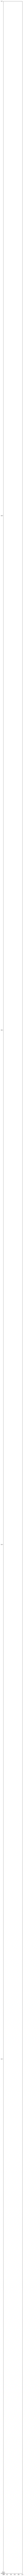

In [42]:
#fig = plt.figure()
xlim=[0.0,0.4]
Q2lim=[0.0,81.0]
ax1 = plt.axes([xlim[0],Q2lim[0],xlim[1],Q2lim[1]])  # Figure limits [left, bottom, width, height]
ax2 = plt.axes([xBin[0]/xlim[1],Q2Bin[0]/Q2lim[1],xBin[1]/xlim[1],Q2Bin[2]/Q2lim[1]]) # subplot 

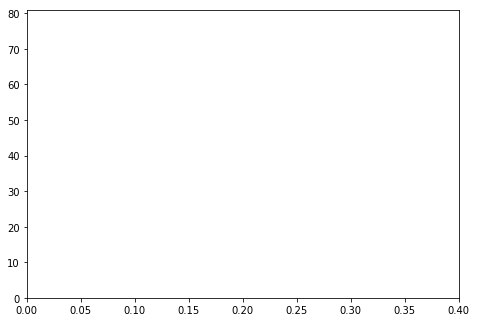

In [46]:
## Figure axes with sub-axis
xlim=[0.0,0.4]
Q2lim=[0.0,81.0]

fig = plt.figure()
ax1 = plt.axes([0,0,1,1],xlim=xlim,ylim=Q2lim)# Figure limits [left, bottom, width, height] 
ax2 = plt.errorbar(data5001['pT2'][data5001['xClas']=='a'],
                   data5001['value'][data5001['xClas']=='a']) # subplot 